<a href="https://colab.research.google.com/github/mervegb/deep-learning/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

In [41]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

In [42]:
trainset = datasets.MNIST('PATH_TO_STORE_TRAINSET', download=True, train=True, transform=transform)
valset = datasets.MNIST('PATH_TO_STORE_TESTSET', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 164442669.50it/s]

Extracting PATH_TO_STORE_TRAINSET/MNIST/raw/train-images-idx3-ubyte.gz to PATH_TO_STORE_TRAINSET/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 46182117.36it/s]


Extracting PATH_TO_STORE_TRAINSET/MNIST/raw/train-labels-idx1-ubyte.gz to PATH_TO_STORE_TRAINSET/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 46798244.68it/s]


Extracting PATH_TO_STORE_TRAINSET/MNIST/raw/t10k-images-idx3-ubyte.gz to PATH_TO_STORE_TRAINSET/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 10410125.01it/s]


Extracting PATH_TO_STORE_TRAINSET/MNIST/raw/t10k-labels-idx1-ubyte.gz to PATH_TO_STORE_TRAINSET/MNIST/raw



100%|██████████| 9912422/9912422 [00:00<00:00, 150524832.08it/s]

Extracting PATH_TO_STORE_TESTSET/MNIST/raw/train-images-idx3-ubyte.gz to PATH_TO_STORE_TESTSET/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 27142212.37it/s]


Extracting PATH_TO_STORE_TESTSET/MNIST/raw/train-labels-idx1-ubyte.gz to PATH_TO_STORE_TESTSET/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 43009007.39it/s]

Extracting PATH_TO_STORE_TESTSET/MNIST/raw/t10k-images-idx3-ubyte.gz to PATH_TO_STORE_TESTSET/MNIST/raw

100%|██████████| 4542/4542 [00:00<00:00, 12211877.42it/s]

Extracting PATH_TO_STORE_TESTSET/MNIST/raw/t10k-labels-idx1-ubyte.gz to PATH_TO_STORE_TESTSET/MNIST/raw



In [44]:
dataiter = iter(trainloader)
images, labels = next(dataiter)

print(images.shape)
# torch.Size([64,1,28,28]) => there are 64 images in each batch and each image has a dimension of 28*28 pixels

print(labels.shape)
# torch.Size([64]) => 64 images have 64 labels respectively

torch.Size([64, 1, 28, 28])
torch.Size([64])


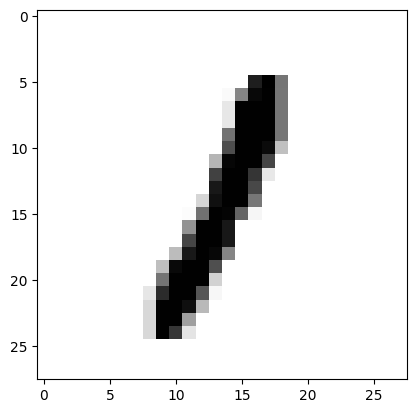

In [46]:
#lets display the first image from the training set
plt.imshow(images[0].numpy().squeeze(), cmap="gray_r")

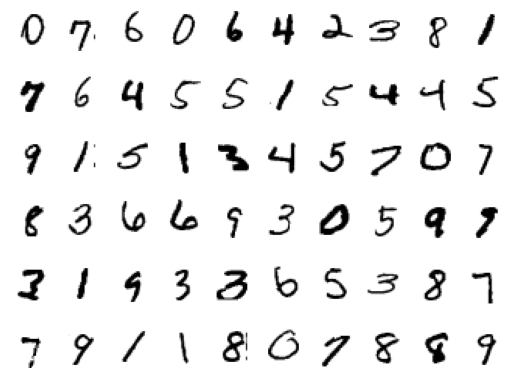

In [47]:
#generate grid of images in a random order
figure = plt.figure()
num_of_images = 60

for index in range(1, num_of_images + 1):
  plt.subplot(6,10,index)
  plt.axis("off")
  plt.imshow(images[index].numpy().squeeze(), cmap="gray_r")

In [48]:
#ReLU Activation => allows positive values to pass through, whereas negative values are modified to zero
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))

print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


In [50]:
#We flatten out each image before sending it inside the neural network (28*28 = 784)
#That's why we have 784 units in the first layer

criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0],-1)

logps = model(images) #log probabilities
loss = criterion(logps, labels) #calculate the NLL Loss

In [51]:
#Neural network learns by iterating multiple times over the available data
#The term learn refers to the adjustment of weights of the network to minimize the loss

print('Before backward pass: \n', model[0].weight.grad)
loss.backward()
print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[ 0.0025,  0.0025,  0.0025,  ...,  0.0025,  0.0025,  0.0025],
        [ 0.0001,  0.0001,  0.0001,  ...,  0.0001,  0.0001,  0.0001],
        [ 0.0047,  0.0047,  0.0047,  ...,  0.0047,  0.0047,  0.0047],
        ...,
        [ 0.0004,  0.0004,  0.0004,  ...,  0.0004,  0.0004,  0.0004],
        [-0.0004, -0.0004, -0.0004,  ..., -0.0004, -0.0004, -0.0004],
        [-0.0008, -0.0008, -0.0008,  ..., -0.0008, -0.0008, -0.0008]])


In [52]:
#Neural network iterates over the training set and updates the weights
#We use torch.optim to optimize the model, perform gradient descent and update the weights by backpropagation
#In each epoch, we will be seeing a gradual decrease in training loss

optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 15

for e in range(epochs):
  running_loss = 0

  for images, labels in trainloader:
    # Flatten MNIST images into a 784 long vector
    images = images.view(images.shape[0], -1)

    optimizer.zero_grad()

    output = model(images)
    loss = criterion(output, labels)

    #this is where model learns by backpropagating
    loss.backward()

    #optimize its weights
    optimizer.step()

    running_loss += loss.item()

  print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
  print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 0.6348728632717244

Training Time (in minutes) = 0.2722328186035156
Epoch 1 - Training loss: 0.27779964688045383

Training Time (in minutes) = 0.54232736825943
Epoch 2 - Training loss: 0.21605358826421472

Training Time (in minutes) = 0.8248156785964966
Epoch 3 - Training loss: 0.17550937834579045

Training Time (in minutes) = 1.1068224787712098
Epoch 4 - Training loss: 0.14701481437338376

Training Time (in minutes) = 1.376260260740916
Epoch 5 - Training loss: 0.12511849769258074

Training Time (in minutes) = 1.6571165561676025
Epoch 6 - Training loss: 0.11097377369990513

Training Time (in minutes) = 1.9300968289375304
Epoch 7 - Training loss: 0.09794619674635514

Training Time (in minutes) = 2.19787917137146
Epoch 8 - Training loss: 0.08749889985356392

Training Time (in minutes) = 2.477375324567159
Epoch 9 - Training loss: 0.07994095188007554

Training Time (in minutes) = 2.7481035629908246
Epoch 10 - Training loss: 0.07385801275504995

Training Time (in mi

In [53]:
def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()


Predicted Digit = 6


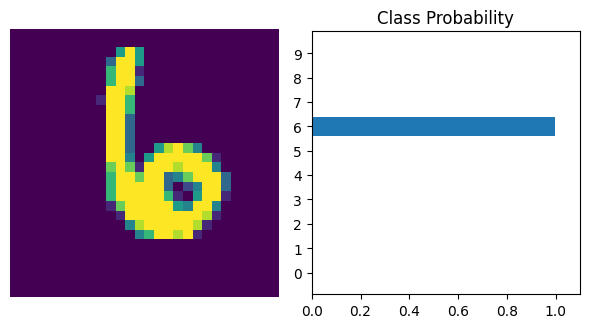

In [54]:
#We have to evaluate it
images, labels = next(iter(valloader))

img = images[0].view(1, 784)
with torch.no_grad():
    logps = model(img)

ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps)


In [55]:
#We iterate through validation set using for loop, and calcuate the total number of correct predictions
correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        logps = model(img)


    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

#The reason we got such a high accuracy was that our data-set was clean, had a variety of well-shuffled images and a large number of them. This made our model well prepared to recognize a large number of unseen digits.

Number Of Images Tested = 10000

Model Accuracy = 0.9749
